# **Automated Prediction of Customer Complaint Resolution Time for Improved Support Operations**

## Project Description
This project focuses on developing a machine learning pipeline to predict the resolution time of customer complaints based on structured features such as message length, submission channel, response time (seconds) and platform type. The objective is to help support teams better estimate time-to-resolution, optimize ticket prioritization, and allocate resources effectively. We used variety of supervised algorithms — Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor, Support Vector Regressor (SVR) and K-Nearest Neighbors Regressor.

Structured categorical variables like Platform Type (Desktop, Mobile App, Web) and Submission Channel (Email, Phone, Live Chat) are transformed using one-hot encoding and model performance is evaluated using MAE (Mean Absolute Error), RMSE (Root Mean Squared Error) and R² Score to select the best-performing model.

## 1.1 Importing the required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 1.2 Dataset Loading and Initial Exploration
In this section, we load the structured dataset created for the project and perform an initial exploration to understand the available input features and target variable (Resolution Time (min)). This understanding will help guide the feature engineering and model selection process.

In [6]:
df = pd.read_csv('Project Data.csv')
print(df.head())

                                  Customer Statement  Message Length  \
0  The  shutdown unexpectedly while I was working...              11   
1  Software force close happens every time I open...              10   
2  It triggers a software quit before I can even ...              11   
3  I edited the file but nothing saved. A classic...              14   
4  Submission keeps failing with a software form ...               9   

  Platform Type Submission Channel  Response Time (sec)  \
0           Web              Phone                   16   
1    Mobile App              Email                 3776   
2           Web          Live Chat                   21   
3    Mobile App              Phone                   53   
4       Desktop              Phone                  116   

   Resolution Time (min)  Issue Category  
0                      6  Software Issue  
1                   1603  Software Issue  
2                     12  Software Issue  
3                      4  Software Issue

In [7]:
#get the number of rows in the DataFrame
num_rows = df.shape[0]
print(f"Number of customer statements: {num_rows}")

Number of customer statements: 150


In [8]:
#check for any missing values in the dataset
df.isnull().sum()

Customer Statement       0
Message Length           0
Platform Type            0
Submission Channel       0
Response Time (sec)      0
Resolution Time (min)    0
Issue Category           0
dtype: int64

### Feature Engineering and Preprocessing
Before training models, we prepare the data by creating necessary features and encoding categorical variables into numerical format using one-hot encoding.

In [10]:
#select only the required columns
df_model = df[['Message Length', 'Submission Channel', 'Platform Type', 'Resolution Time (min)', 'Response Time (sec)']]

#convert Resolution Time from minutes to seconds
df_model['Resolution Time (sec)'] = df_model['Resolution Time (min)'] * 60

#drop the original 'Resolution Time (min)' column
df_model = df_model.drop(columns=['Resolution Time (min)'])

#changing the categorical variables to numerical values using one-hot encoding
df_encoded = pd.get_dummies(df_model, columns=['Submission Channel', 'Platform Type'])
df_encoded = df_encoded.astype(int)

#display the first few rows
df_encoded.head()

/var/folders/lq/5v13smrj3vj0t0v0z9g92tmw0000gn/T/ipykernel_53683/4091950284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Resolution Time (sec)'] = df_model['Resolution Time (min)'] * 60


,Message Length,Response Time (sec),Resolution Time (sec),Submission Channel_Email,Submission Channel_Live Chat,Submission Channel_Phone,Platform Type_Desktop,Platform Type_Mobile App,Platform Type_Web
0,11,16,360,0,0,1,0,0,1
1,10,3776,96180,1,0,0,0,1,0
2,11,21,720,0,1,0,0,0,1
3,14,53,240,0,0,1,0,1,0
4,9,116,180,0,0,1,1,0,0


### Correlation Matrix

We plot the correlation matrix to check which input features are more related to the target variable (Resolution Time)

Resolution Time (sec)           1.000000
Submission Channel_Email        0.810989
Response Time (sec)             0.726854
Platform Type_Desktop           0.056417
Message Length                  0.037209
Platform Type_Mobile App        0.013793
Platform Type_Web              -0.073713
Submission Channel_Live Chat   -0.345918
Submission Channel_Phone       -0.461696
Name: Resolution Time (sec), dtype: float64


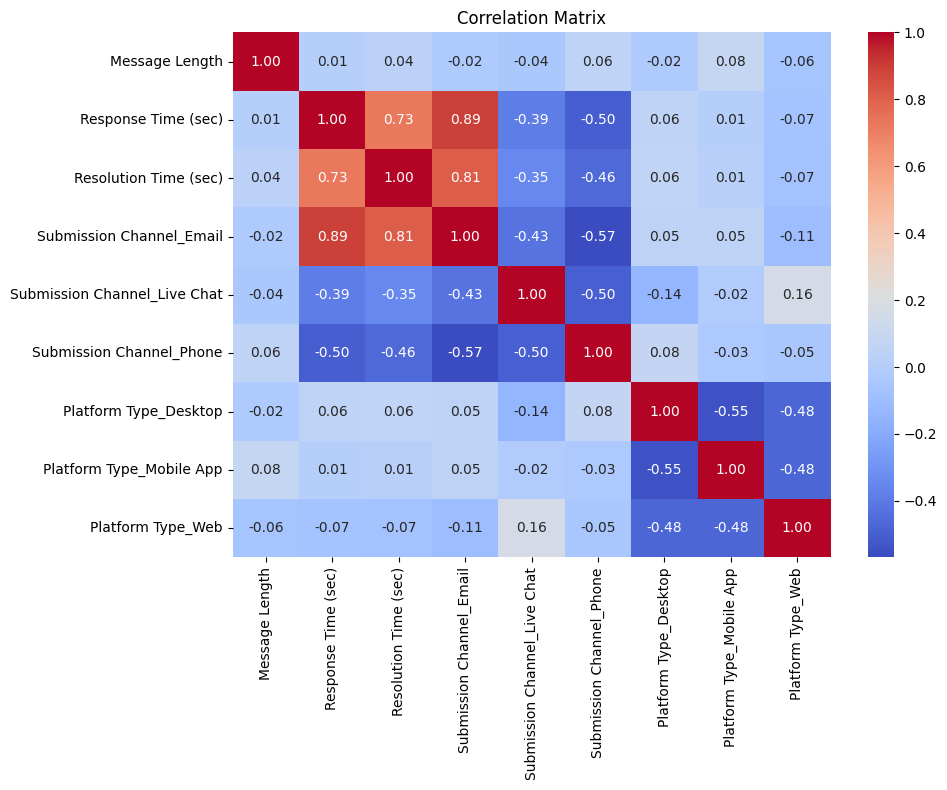

In [12]:
#calculate correlation matrix
correlation_matrix = df_encoded.corr()

#display correlation matrix
print(correlation_matrix['Resolution Time (sec)'].sort_values(ascending=False))

#heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [13]:
#defining features and target variables
X = df_encoded.drop('Resolution Time (sec)', axis=1)
y = df_encoded['Resolution Time (sec)']

## 1.3 Train-Test Split
We split the dataset into training and testing sets to evaluate model performance on unseen data.

In [15]:
#splitting data into test/train splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1.4 Model Selection, Training and Evaluation
We train multiple supervised regression models separately, allowing each model to learn the relationship between input features and resolution time (target variable). The different models are trained on the dataset and each model’s performance is evaluated using MAE (Mean Absolute Error), RMSE(Root Mean Squared Error), and R² Score.

In [17]:
#training different regression models
#initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor()
}

#fit models and store predictions
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R2 Score": r2}

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.355e+09, tolerance: 2.693e+07
  model = cd_fast.enet_coordinate_descent(


## 1.5 Model Performance Comparison
We summarize the model performances to identify the most efficient regressor based on the lowest MAE and RMSE and highest R² score.

In [19]:
#compare model performances and create results DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                                        MAE          RMSE  R2 Score
Linear Regression              18061.535471  33143.112075  0.657927
Random Forest Regressor        19394.665000  39120.215212  0.523422
Gradient Boosting Regressor    18436.682689  39437.444798  0.515661
Ridge Regression               18339.245879  34295.396014  0.633728
Lasso Regression               18061.417377  33143.273481  0.657924
Decision Tree Regressor        24134.000000  49569.796853  0.234815
K-Nearest Neighbors Regressor  19386.800000  37941.419836  0.551710


## 1.6 Error Analysis and Visualizing Model Performance
In this section, we perform a detailed error analysis for each regression model. We visualize residual distributions to understand how errors are spread, and plot predicted versus actual values to assess model accuracy. Additionally, we compare all models using bar plots for MAE, RMSE, and R² scores to identify the most effective model for predicting resolution time.

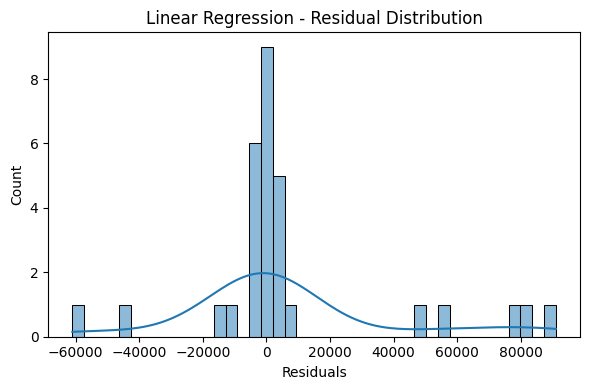

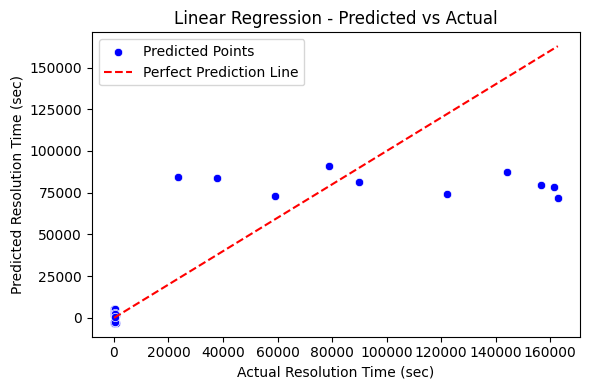

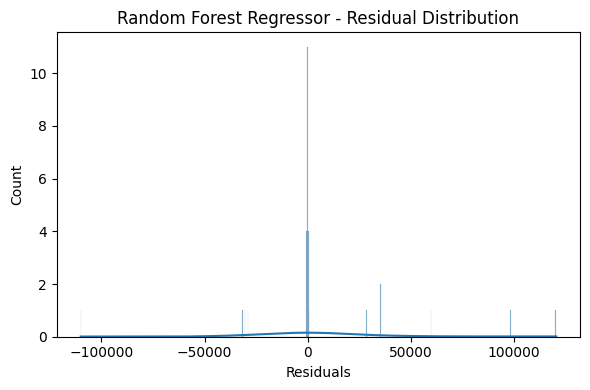

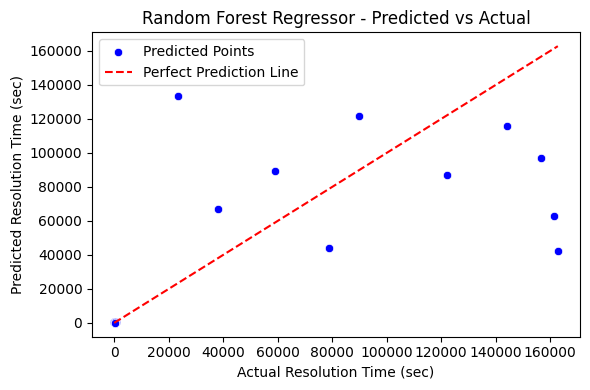

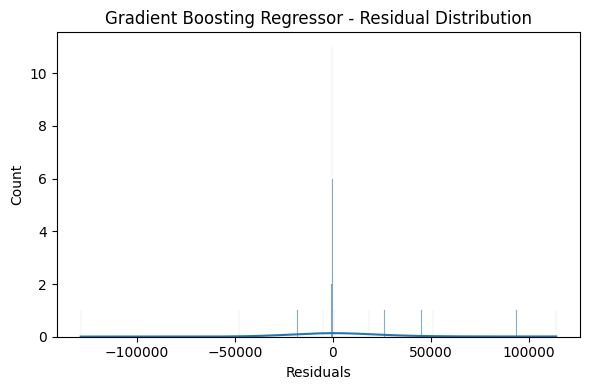

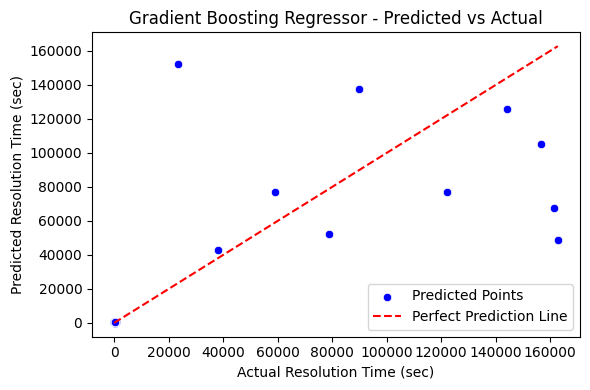

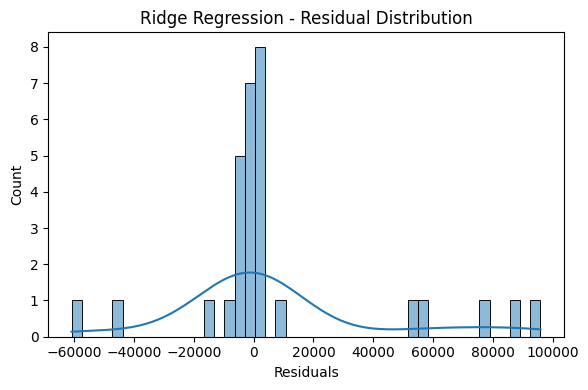

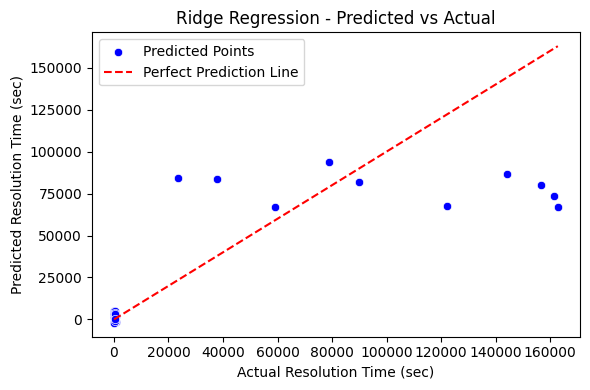

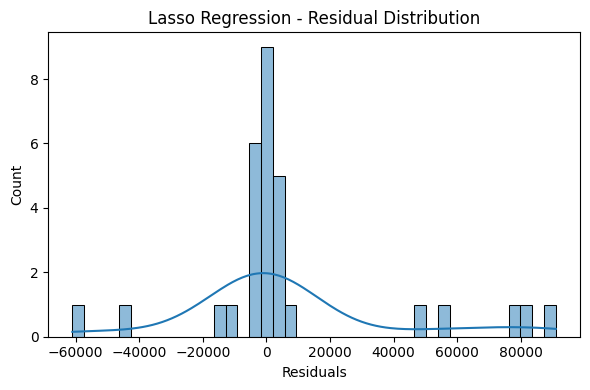

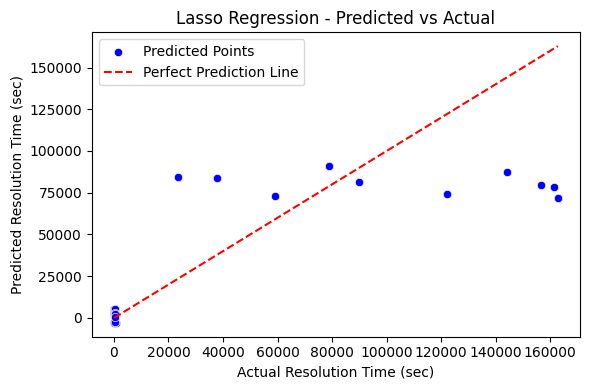

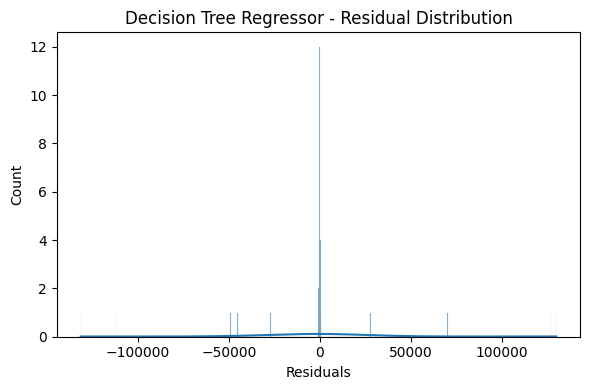

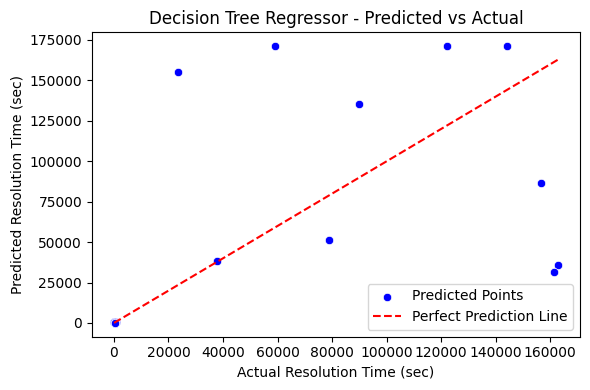

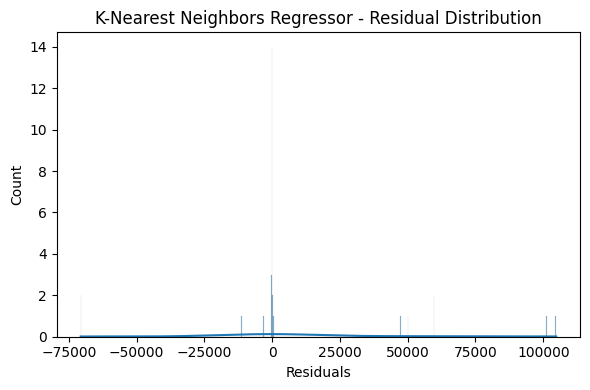

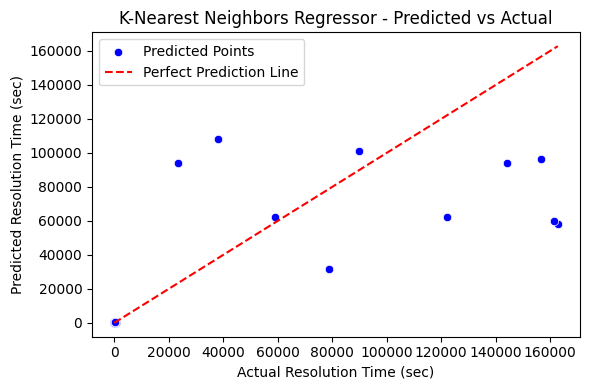

In [21]:
#visualize predictions
for name, model in models.items():
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    # --- Residual Plot ---
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True)
    plt.title(f'{name} - Residual Distribution')
    plt.xlabel('Residuals')
    plt.tight_layout()
    plt.show()

    # --- Prediction Error Plot ---
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted Points')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')
    plt.xlabel('Actual Resolution Time (sec)')
    plt.ylabel('Predicted Resolution Time (sec)')
    plt.title(f'{name} - Predicted vs Actual')
    plt.legend()
    plt.tight_layout()
    plt.show()

/var/folders/lq/5v13smrj3vj0t0v0z9g92tmw0000gn/T/ipykernel_53683/460675760.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y="R2 Score", data=results_df, palette="viridis")


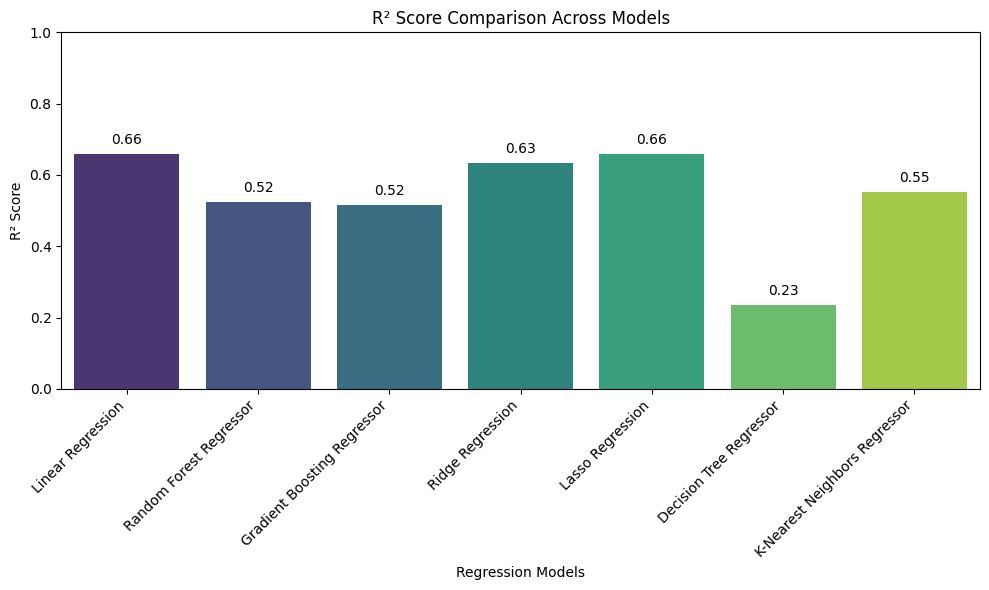

/var/folders/lq/5v13smrj3vj0t0v0z9g92tmw0000gn/T/ipykernel_53683/460675760.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y="MAE", data=results_df, palette="coolwarm")


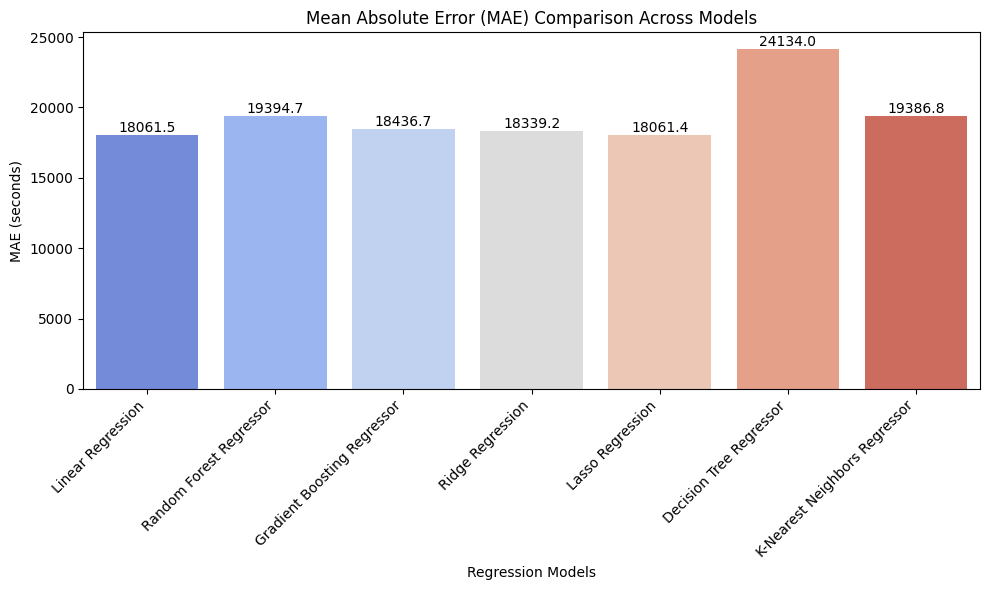

/var/folders/lq/5v13smrj3vj0t0v0z9g92tmw0000gn/T/ipykernel_53683/460675760.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y="RMSE", data=results_df, palette="coolwarm")


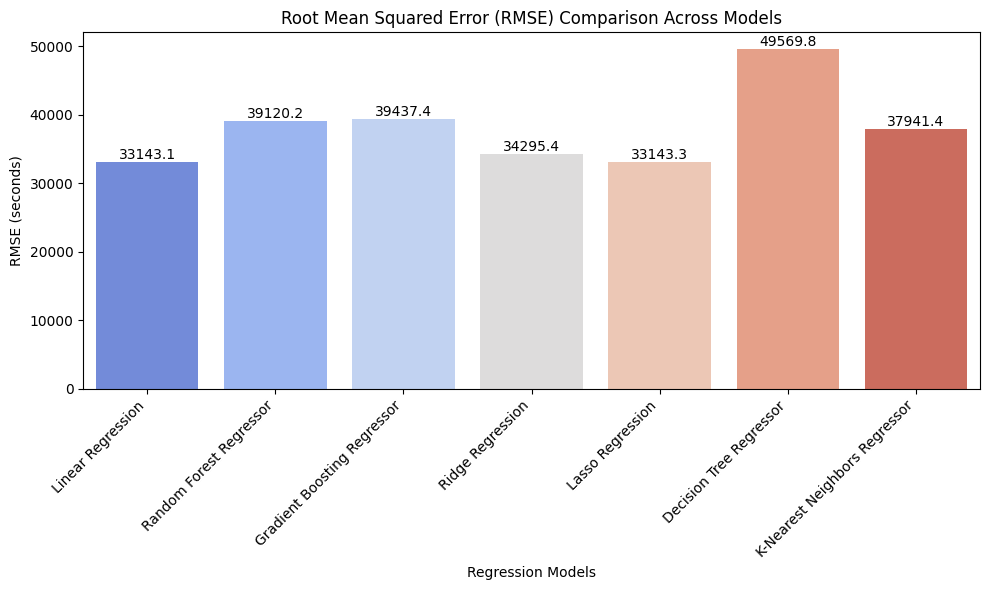

In [22]:
#bar plot of R2 scores
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="R2 Score", data=results_df, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('R² Score Comparison Across Models')
plt.ylabel('R² Score')
plt.xlabel('Regression Models')
plt.ylim(0, 1)

#add numbers on bars
for index, value in enumerate(results_df["R2 Score"]):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#bar plot of MAE
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="MAE", data=results_df, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title('Mean Absolute Error (MAE) Comparison Across Models')
plt.ylabel('MAE (seconds)')
plt.xlabel('Regression Models')

#add numbers on bars
for index, value in enumerate(results_df["MAE"]):
    plt.text(index, value + 10, f'{value:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#bar plot of RMSE
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="RMSE", data=results_df, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title('Root Mean Squared Error (RMSE) Comparison Across Models')
plt.ylabel('RMSE (seconds)')
plt.xlabel('Regression Models')

#add numbers on bars
for index, value in enumerate(results_df["RMSE"]):
    plt.text(index, value + 10, f'{value:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 1.7 Key Findings and Conclusion

After evaluating multiple regression models on the dataset, **Linear Regression** and **Lasso Regression** was found to perform the best, achieving:

Linear regression:
- **R² Score:** 0.66
- **Mean Absolute Error (MAE):** 18061.53 seconds ~ 5 hours
- **Root Mean Squared Error (RMSE):**3143.11 seconds ~ 9 hourss

Lasso Regression:
- **R² Score:** 0.66
- **Mean Absolute Error (MAE):*18061.4 seconds ~ 5 hourses
- **Root Mean Squared Error (RMSE):33143.3 seconds ~ 9 hours
### Conclusion and Future Work
In our project, Lasso Regression and Linear Regression achieved almost identical performance. This occurred because the dataset had a limited number of structured features, all of which were meaningful for prediction. With a low regularization strength (alpha=0.1), Lasso did not eliminate any features, resulting in similar behavior to Linear Regression. More complex models like Random Forest and Gradient Boosting were less effective due to the relatively small dataset size and the lack of highly nonlinear feature relationships. Future work can involve incorporating text features, handling outliers, and expanding the dataset to leverage more powerful ensemble methods.
nce.